# HSE 2021: Mathematical Methods for Data Analysis

## Homework 1

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random

from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

rs = np.random.RandomState(1234)
random.seed(11)


# 1. Python (2 points)

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [2]:
def find_sum(a,d,N):
    arr_sum = 0
    
    for i in range(N):
        arr_sum += i*d + a
    
    return arr_sum


a = 2
d = 3
N = 15
print(find_sum(a,d,N))

345


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [3]:
def check_prime(N):
    for i in range(2, N - 1):
        if N % i == 0:
            return False
    return True

for N in [3,8, 13, 111, 113, 237, 307, 479, 481]:
    print(N, check_prime(N))

3 True
8 False
13 True
111 False
113 True
237 False
307 True
479 True
481 False


**Task 3** (0.5 points) <br/> 
Find the first `N` prime numbers (you may use the function from the precious task).

In [4]:
def find_primes(N):
    primes = []
    count = 0
    i = 2
    
    while count < N:
        if check_prime(i):
            primes.append(i)
            count += 1
        i += 1
    
    return primes


print(find_primes(5))
print(find_primes(10))
print(find_primes(20))

[2, 3, 5, 7, 11]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the maximum number.

In [5]:
from random import randint

def find_max(a, b, c):
    if a >= b and a >= c:
        return a
    elif b >= a and b >= c:
        return b
    elif c >= a and c >= b:
        return c

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMaximum:', find_max(a, b, c))

15 43 99 	Maximum: 99
19 15 30 	Maximum: 30
50 -52 -53 	Maximum: 50
31 21 61 	Maximum: 61
57 -53 -76 	Maximum: 57
14 -23 -64 	Maximum: 14
-77 37 77 	Maximum: 77
62 -90 52 	Maximum: 62
1 15 67 	Maximum: 67
89 57 66 	Maximum: 89


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`rs.rand()`) with length of 10 and with sum of its elements equals to 2.

In [6]:
my_array = np.random.rand(10)
my_array = my_array / np.sum(my_array) * 2
print(len(my_array))
print(np.sum(my_array))

10
2.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations.**:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}$$


In [7]:
def cal_euclidean(a, b):
    distance = np.sqrt(((a - b)**2).sum())
    return distance

def cal_manhattan(a, b):    
    distance = (np.abs(a - b)).sum()
    return distance

def cal_cosine(a, b):
    a_l2 = np.sqrt((a*a).sum())
    b_l2 = np.sqrt((b*b).sum())
    distance = 1 - (np.dot(a.T, b) / (a_l2 * b_l2))
    return distance

In [8]:
a = rs.randint(-10, 10, size=10)
b = rs.randint(-10, 10, size=10)
print(cal_euclidean(a, b))
print(cal_manhattan(a, b))
print(cal_cosine(a, b))

19.544820285692065
52
0.7085654315950485


**Task 3** (0.5 points) <br/>
Create a random array (`rs.randint()`) with length of 100. Transform the array so that 
* Maximum element(s) value is 1
* Minimum element(s) value is 0
* Other values are in interval 0-1 with keeping the order

In [9]:
my_array = sorted(rs.randint(0, 1000, size=100))
my_array[0] = 0
my_array = np.array([x / np.max(my_array) for x in my_array])

print(np.max(my_array), np.min(my_array))
print(my_array)

1.0 0.0
[0.         0.00401204 0.01003009 0.01404213 0.01805416 0.04112337
 0.04513541 0.08124373 0.08224674 0.08425276 0.08625878 0.10330993
 0.11634905 0.11935807 0.13540622 0.13941825 0.18355065 0.19558676
 0.19658977 0.19759278 0.23570712 0.23671013 0.24373119 0.2447342
 0.25677031 0.25877633 0.27582748 0.28485456 0.30391174 0.31193581
 0.33500502 0.33701103 0.34102307 0.34603811 0.34704112 0.3550652
 0.36609829 0.37211635 0.37512538 0.3781344  0.41825476 0.43530592
 0.44132397 0.45636911 0.46038114 0.4663992  0.48345035 0.49147442
 0.49849549 0.50752257 0.52958877 0.54764293 0.56068205 0.57572718
 0.59879639 0.60280843 0.60982949 0.61885657 0.62086259 0.62086259
 0.62688064 0.63490471 0.64192578 0.66499498 0.67301906 0.68806419
 0.6890672  0.69107322 0.70912738 0.74523571 0.74724173 0.75225677
 0.76328987 0.76328987 0.76328987 0.78335005 0.79137412 0.80742227
 0.80842528 0.83049147 0.84052156 0.84252758 0.84553661 0.85757272
 0.88465396 0.90371113 0.9107322  0.9107322  0.91374122 

**Task 4** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integers from [0,50]. Print a column that contains the maximum element of the array.

In [10]:
my_array = rs.randint(0, 51, size=(5, 6))
selected_column = my_array[:, np.argmax(np.sum(my_array == np.max(my_array), axis=0))]
print('Shape: ',my_array.shape)
print('Array')
print(my_array)
print(selected_column)

Shape:  (5, 6)
Array
[[39 17  0 21 41 50]
 [41  1 14  3 30 12]
 [ 9 45 19 26 32  4]
 [36  0 22 20  8 44]
 [49 24 30 41 15  8]]
[50 12  4 44  8]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [11]:
arr = rs.rand(10)
idx = rs.randint(0, 10, 4)
arr[idx] = np.nan

arr

array([0.43830988, 0.15257277,        nan,        nan, 0.95142876,
              nan, 0.50255956, 0.53687819, 0.81920207, 0.05711564])

In [12]:
replace_func = np.vectorize(lambda x: arr[~np.isnan(arr)].mean() if np.isnan(x) else x)
arr = replace_func(arr)
print(arr)

[0.43830988 0.15257277 0.49400955 0.49400955 0.95142876 0.49400955
 0.50255956 0.53687819 0.81920207 0.05711564]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [13]:
def mean_channel(X):
    mean_vector = []
    for i in range(3):
        mean_vector.append(X[:, :, i].flatten().mean())
    
    return mean_vector

In [14]:
n = 28
m = 16
X =  rs.randint(-10, 10, size=(n,m,3))
mean_channel(X)

[-0.15401785714285715, -0.5, -0.07366071428571429]

**Task 7** (1 points) <br/>
Create a function which takes a matrix ```X``` as an input and returns all its unique rows as a matrix, i.e. in a 3D matrix you need to return all unique horizontal layers.

Sample input:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])
        
Sample output:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])

In [15]:
def get_unique_rows(X):
    X_unique = []
    
    for i in range(len(X)):

        has_equal = False
        for j in range(i+1, len(X)):
            num_elems_equal = (X[i] == X[j]).sum()
            num_elems_total = len(X[i].flatten())
            
            if num_elems_equal == num_elems_total:
                has_equal = True
                break
        
        if not has_equal:
            X_unique.append(X[i])
            
    return np.array(X_unique)

In [16]:
X =  rs.randint(4, 6, size=(n, 2, 2))
print(X)

[[[5 5]
  [5 5]]

 [[5 5]
  [4 5]]

 [[4 4]
  [4 5]]

 [[5 4]
  [4 4]]

 [[5 4]
  [5 5]]

 [[5 4]
  [5 5]]

 [[5 5]
  [4 4]]

 [[4 4]
  [4 5]]

 [[4 5]
  [5 5]]

 [[5 5]
  [4 4]]

 [[5 5]
  [4 5]]

 [[5 5]
  [5 4]]

 [[5 4]
  [4 4]]

 [[5 5]
  [4 4]]

 [[5 5]
  [5 5]]

 [[5 4]
  [5 4]]

 [[4 5]
  [4 4]]

 [[5 5]
  [5 5]]

 [[4 5]
  [5 4]]

 [[5 4]
  [4 5]]

 [[4 5]
  [4 5]]

 [[4 5]
  [4 5]]

 [[5 5]
  [4 4]]

 [[5 5]
  [5 5]]

 [[5 4]
  [4 4]]

 [[4 5]
  [4 5]]

 [[5 5]
  [5 4]]

 [[5 5]
  [5 5]]]


In [17]:
get_unique_rows(X)

array([[[5, 4],
        [5, 5]],

       [[4, 4],
        [4, 5]],

       [[4, 5],
        [5, 5]],

       [[5, 5],
        [4, 5]],

       [[5, 4],
        [5, 4]],

       [[4, 5],
        [4, 4]],

       [[4, 5],
        [5, 4]],

       [[5, 4],
        [4, 5]],

       [[5, 5],
        [4, 4]],

       [[5, 4],
        [4, 4]],

       [[4, 5],
        [4, 5]],

       [[5, 5],
        [5, 4]],

       [[5, 5],
        [5, 5]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

In [18]:
# load the dataset
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * How many classes (pclass) were there on Tinanic?
    * What is the percentage of survived passengers? Are the classes balanced?
    * What is the average ticket fare?
    * What what the most popular port of embarkation?
Please, write not only the answers but the code, proving it.

In [19]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Yes, there are missing values in columns Age, Cabin, Embarked.

In [20]:
dataset.Pclass.unique()

array([3, 1, 2])

There were 3 classes on Titanic.

Proportion of died passengaers: 0.6161616161616161
Proportion of survived passengaers: 0.3838383838383838


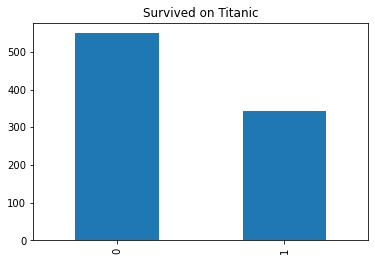

In [21]:
print("Proportion of died passengaers:", len(dataset[dataset.Survived == 0]) / len(dataset))
print("Proportion of survived passengaers:", len(dataset[dataset.Survived == 1]) / len(dataset))
dataset.Survived.value_counts().plot.bar(title="Survived on Titanic");

The percentage of died passengers is nearly 61%, while the percentage of survived passengers is around 38%.

The classes are not very good balanced, to my great regret died passengers are overrepresented.

In [22]:
print("Average ticket fare:", dataset.Fare.mean())

Average ticket fare: 32.2042079685746


Average ticket fare is nearly 32 (pounds, I suppose)

In [23]:
dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The most popular port of embarkation is Southampton

**Task 2** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [24]:
import re

passanger_titles = dataset.Name.apply(lambda x: re.findall('\w+\.', x)[0])

In [25]:
print("Unique titles:", '; '.join(passanger_titles.unique()))
print("Number of unique titles:", len(passanger_titles.unique()))

Unique titles: Mr.; Mrs.; Miss.; Master.; Don.; Rev.; Dr.; Mme.; Ms.; Major.; Lady.; Sir.; Mlle.; Col.; Capt.; Countess.; Jonkheer.
Number of unique titles: 17


There are 17 unique titles.

The most popular man's title is <b><i>Mr</i></b>. And woman's title - <b><i>Miss</i></b>.

The numbers of passengers with every title are:

In [26]:
passanger_titles.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Don.           1
Lady.          1
Sir.           1
Mme.           1
Capt.          1
Ms.            1
Jonkheer.      1
Countess.      1
Name: Name, dtype: int64

**Task 3** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? Visualize it on the plot
    * Make conclusions about what you see on the plot

Minimal age: 0.42
Maximal age: 80.0
Mean age: 29.69911764705882


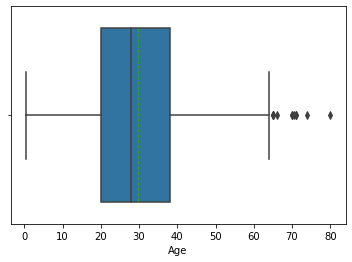

In [27]:
print('Minimal age:', dataset.Age.min())
print('Maximal age:', dataset.Age.max())
print('Mean age:', dataset.Age.mean())

sns.boxplot(x=dataset.Age, showmeans=True, meanline=True);

So, we can see from this boxplot that 50% of passengers were people aged about from 20 to 40 years, and the mean age is slightly below 30. We can conclude, that young adults were the major age group of passengers of Titanic.

**Task 4** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Make conclusions about what you see on the plot

Mean age of those who survived: 28.343689655172415
Mean age of those who died: 30.62617924528302


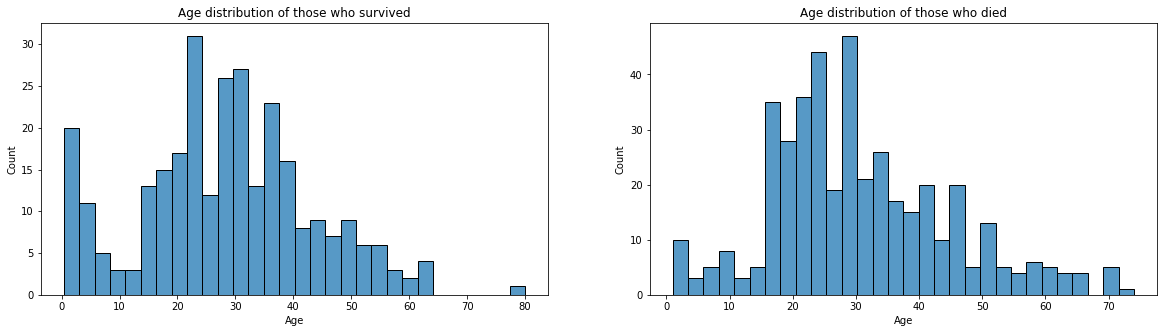

In [28]:
print('Mean age of those who survived:', dataset[dataset.Survived == 1].Age.mean())
print('Mean age of those who died:', dataset[dataset.Survived == 0].Age.mean())

fig, ax = plt.subplots(
    nrows = 1, ncols = 2,
    figsize = (20, 5)
)

sns.histplot(dataset[dataset.Survived == 1].Age, ax=ax[0], bins=30)
ax[0].set_title('Age distribution of those who survived')

sns.histplot(dataset[dataset.Survived == 0].Age, ax=ax[1], bins=30)
ax[1].set_title('Age distribution of those who died')

plt.show();

Two distributions has some similarities: for example, the most frequent ages are in the interval of 20-40. This can be explained by the fact that this the largest age group. Mean values are close to each other.

However, there are many differences. Children aged up to 10 years survived more frequently. Old people of age 60 and more years died more frequently.

**Task 5** (0.5 points) <br/>
Is there correlation between the port of embarkation and the ticket price? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



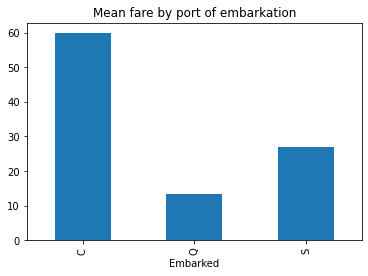

In [29]:
dataset.groupby('Embarked').Fare.mean().plot.bar(title='Mean fare by port of embarkation');

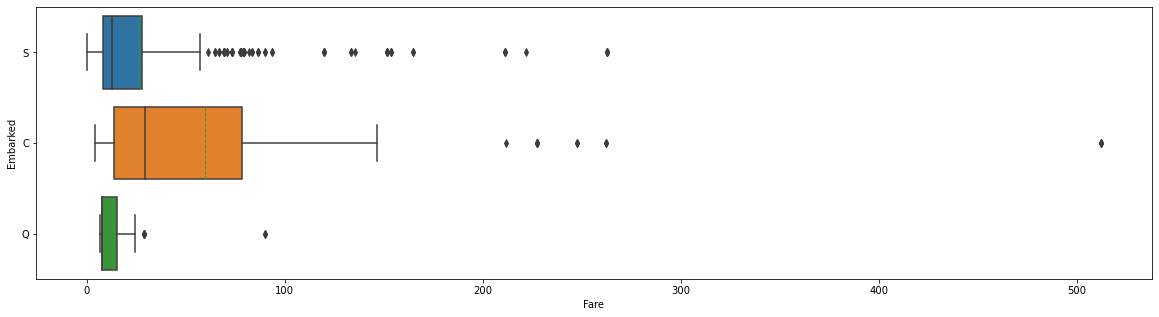

In [30]:
fig, ax = plt.subplots(figsize = (20, 5))

sns.boxplot(y=dataset.Embarked, x=dataset.Fare, showmeans=True, meanline=True)

plt.show();

**Task 6** (0.5 points) <br/>
The same question as in task 5 about correlation between *pclass* and *ticket priсe*.

In [31]:
## You code here